# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']


### Now take a look at the shapes of the X and y matricies 

In [2]:
display(X.shape)
display(y.shape)

(70000, 784)

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [4]:
import matplotlib.pyplot as plt

x = X.reshape(-1,28,28)

def plot_number(df_number):
    
    return plt.imshow(df_number, cmap = plt.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

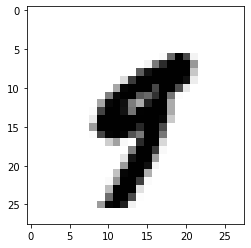

In [5]:
plot_number(x[36000])

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [6]:
X_train_numbers = X[:60000]
X_test_numbers = X[60000:]

y_train_numbers = y[:60000]
y_test_numbers = y[60000:]


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [7]:
#if the number is 5, we put a "1" and if the number is not 5, we put "0"
y_train_numbers = [1 if a == '5' else 0  for a in y_train_numbers]

y_test_numbers = [1 if a == '5' else 0 for a in y_test_numbers]


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_numbers, y_train_numbers)

/home/ivan/miniconda3/envs/IronHack_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [9]:
y_regression_pred = lr.predict(X_test_numbers)
y_regression_pred

array([0, 0, 0, ..., 0, 1, 0])

### Does the classifier predict correctly the 36000th digit we picked before?

In [10]:
#This question does not make sense, because we have used the digit 36000 to train the models 
# (we partitioned 60000 (train) and 10000 (test))

lr.predict(X[36000:36001])

#when predicting it, we get "0" so this digit is not a 5

array([0])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [11]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [12]:
never_5_clf.fit(X_train_numbers, y_train_numbers)
y_never_pred = never_5_clf.predict(X_test_numbers)
y_never_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

display(confusion_matrix(y_test_numbers, y_regression_pred))
print(f'the precision score of regression is: {precision_score(y_test_numbers, y_regression_pred)}')
print(f'the recall score of regression is: {recall_score(y_test_numbers, y_regression_pred)}')
print(f'the f1 score of regression is: {f1_score(y_test_numbers, y_regression_pred)}')

array([[9034,   74],
       [ 147,  745]])

the precision score of regression is: 0.9096459096459096
the recall score of regression is: 0.8352017937219731
the f1 score of regression is: 0.8708357685563999


In [14]:
display(confusion_matrix(y_test_numbers, y_never_pred))
print(f'the precision score of never model is: {precision_score(y_test_numbers, y_never_pred)}')
print(f'the recall score of never model is: {recall_score(y_test_numbers, y_never_pred)}')
print(f'the f1 score of never model is: {f1_score(y_test_numbers, y_never_pred)}')

array([[9108,    0],
       [ 892,    0]])

/home/ivan/miniconda3/envs/IronHack_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the precision score of never model is: 0.0
the recall score of never model is: 0.0
the f1 score of never model is: 0.0


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
"""
The regression model does obtain TP and FP, since it does predict the number 5; 
so if we can get the precision and recall values. 
On the other hand, the never5 model does not estimate the value, we cannot know these metrics.

precision indicates the proportion of positive identifications that were correct.
recall indicates the proportion of real positives that were correctly identified.

"""

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [21]:
from sklearn.metrics import roc_curve

print(f'the roc_auc of regression model is:\n{roc_curve(y_test_numbers, y_regression_pred)}')
print(f'the roc_auc of never model is:\n{roc_curve(y_test_numbers, y_never_pred)}')

the roc_auc of regression model is:
(array([0.        , 0.00812473, 1.        ]), array([0.        , 0.83520179, 1.        ]), array([2, 1, 0]))
the roc_auc of never model is:
(array([0., 1.]), array([0., 1.]), array([1, 0]))


### Now find the roc_auc_score for each. 

In [20]:
from sklearn.metrics import roc_auc_score

print(f'the roc_auc_score of regression model is: {roc_auc_score(y_test_numbers, y_regression_pred)}')
print(f'the roc_auc_score of never model is: {roc_auc_score(y_test_numbers, y_never_pred)}')

the roc_auc_score of regression model is: 0.9135385341029717
the roc_auc_score of never model is: 0.5


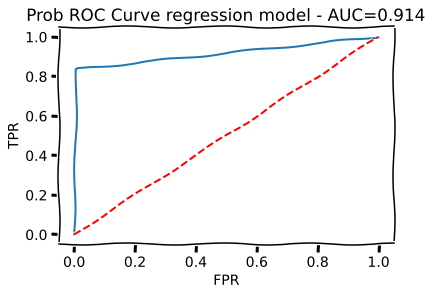

In [24]:
with plt.xkcd():
    fpr, tpr, thresholds = roc_curve(y_test_numbers, y_regression_pred)
    a = roc_auc_score(y_test_numbers, y_regression_pred)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Prob ROC Curve regression model - AUC={a:.3f}')
    plt.show();

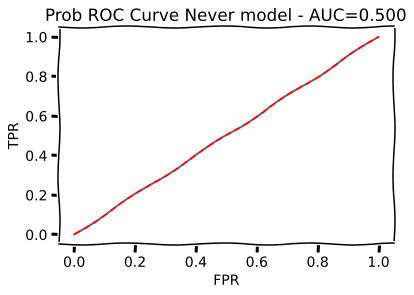

In [23]:
with plt.xkcd():
    fpr, tpr, thresholds = roc_curve(y_test_numbers, y_never_pred)
    a = roc_auc_score(y_test_numbers, y_never_pred)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Prob ROC Curve Never model - AUC={a:.3f}')
    plt.show();

### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
#ROC curve, the area under this curve tells us how perfect or useless our model is, 
# the more area it covers, the better prediction our model will give.

# in this case, the best model is the regression